In [ ]:
# Build a Linear Regression Model with SKLearn, load and analyze Stock Price data, and 
# predict stock prices 30 days in the future!

# quandl library
"""
Get Financial Data Directly into Python
Get millions of financial and economic datasets from hundreds of publishers directly into Python.
Quandl unifies financial and economic datasets from hundreds of publishers on a single user-friendly platform.
"""

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
import datetime
%matplotlib inline

In [2]:
quandl.ApiConfig.api_key="imtfJXzGpVxg2kDC-NAk"

In [3]:
df= quandl.get("WIKI/AMZN")

In [4]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


In [5]:
df=df[["Adj. Close"]]

In [6]:
df.head()

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833


In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing     # Helps standardize our data
from sklearn.linear_model import LinearRegression

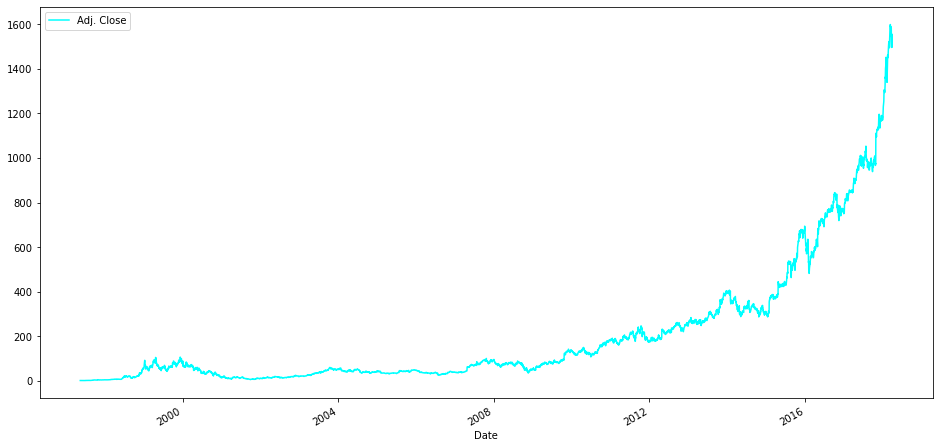

In [8]:
df["Adj. Close"].plot(figsize=(16,8), color="cyan")
plt.legend(loc="best")
plt.show()

In [9]:
predict=30 # Since we are predicting for the next 30 days
df["Prediction"]=df[["Adj. Close"]].shift(-predict) # Data is shifted 30 days up

In [10]:
df

,Adj. Close,Prediction
Date,,
1997-05-16,1.729167,1.541667
1997-05-19,1.708333,1.515833
1997-05-20,1.635833,1.588333
1997-05-21,1.427500,1.911667
1997-05-22,1.395833,2.000000
...,...,...
2018-03-21,1581.860000,NaN
2018-03-22,1544.100000,NaN
2018-03-23,1495.560000,NaN


In [11]:
X = np.array(df.drop(["Prediction"],1)) # 1 specifies column to be deleted
X = preprocessing.scale(X) # Set Mean = 0 and Standar Deviation =1 
X

array([[-0.70904095],
       [-0.70911489],
       [-0.7093722 ],
       ...,
       [ 4.59285269],
       [ 4.80686902],
       [ 4.59814099]])

In [12]:
X.mean()  # Almost 0

-8.665155314147564e-17

In [13]:
X.std()

1.0

In [14]:
X_forecast=X[-predict:] # X vallue with value Nan
X=X[:-predict]

In [15]:
y=np.array(df["Prediction"])

In [16]:
y=y[:-predict]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

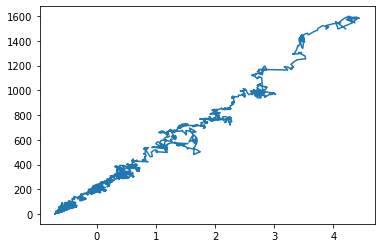

In [18]:
plt.plot(X,y);

In [19]:
clf=LinearRegression()
clf.fit(X_train,y_train)
confidence=clf.score(X_test,y_test)
forecast_predicted=clf.predict(X_forecast)

In [20]:
print(forecast_predicted)

[1496.72481475 1535.46476204 1546.81957418 1532.96267458 1553.80633533
 1569.25354475 1571.2043248  1587.3618726  1610.63340635 1600.06314706
 1600.56144413 1580.41751971 1587.62692424 1612.39334922 1627.2680471
 1635.0711673  1642.34418422 1671.00156724 1691.67559494 1680.85088607
 1683.84066854 1674.6380757  1663.35747802 1634.99695284 1679.08034114
 1674.15038068 1634.1169814  1582.65455553 1646.58501042 1584.23426328]


In [21]:
dates=pd.date_range(start="2018-03-28",end="2018-04-26")    # #0 days in future as in our dataframe

In [22]:
print(dates)

DatetimeIndex(['2018-03-28', '2018-03-29', '2018-03-30', '2018-03-31',
               '2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26'],
              dtype='datetime64[ns]', freq='D')


(17282.0, 18029.5)

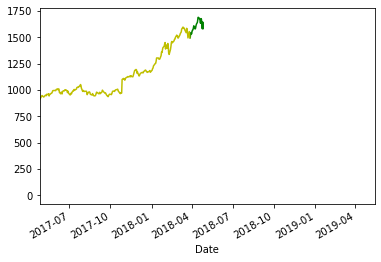

In [23]:
plt.plot(dates,forecast_predicted,color="g")
df["Adj. Close"].plot(color="y")
plt.xlim(xmin=datetime.date(2017,4,26))